In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy
import cartopy.crs as crs
import cartopy.feature as cf
from cartopy.feature import NaturalEarthFeature
import glob
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, ALL_TIMES)
import numpy as np
import xarray as xr
import wrf
import datetime
from matplotlib.patches import Polygon
import sys

In [2]:
ncfile = Dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/WRF_OUTPUT/wrfout_d01_2017-07-01_00:00:00")
data1 = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/WRF_OUTPUT/out.T2.nc")
geog = xr.open_dataset('/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/WRF_OUTPUT/geog_POVALLEY4.nc')

In [3]:
##bio_3x
ncfile_3x = Dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley_bio_off_3x/nest-POVALLEY4/WRF_OUTPUT/wrfout_d01_2017-07-01_00:00:00")
data1_3x = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley_bio_off_3x/nest-POVALLEY4-BIOx3/out.T2_3X.nc")

In [4]:
qn_join = data1.T2
h_layer = getvar(ncfile, "height_agl")

In [7]:
qn_join_3x = data1_3x.T2
h_layer_3x = getvar(ncfile_3x, "height_agl")

In [8]:
ds_sea = geog.LANDUSEF[:,16,:,:]
ds_mask = geog.HGT_M[0,:,:]

In [9]:
qn_int_mean = qn_join.mean('Time') #integrato verticale mediato sul tempo

In [10]:
qn_int_mean

<xarray.DataArray 'T2' (south_north: 168, west_east: 258)>
array([[297.8468 , 297.8474 , 297.84753, ..., 296.80994, 296.85916,
        296.9101 ],
       [297.8445 , 297.8493 , 297.85117, ..., 297.20178, 297.33185,
        297.35965],
       [297.84003, 297.84543, 297.84808, ..., 297.50342, 297.6548 ,
        297.7574 ],
       ...,
       [300.5391 , 300.5613 , 300.60178, ..., 299.4061 , 299.3794 ,
        299.32437],
       [300.52863, 300.54498, 300.5747 , ..., 299.39194, 299.38556,
        299.36215],
       [300.50003, 300.565  , 300.59885, ..., 299.39114, 299.40344,
        299.3743 ]], dtype=float32)
Dimensions without coordinates: south_north, west_east

Text(0.5, 1.0, 'TIME MEAN OF TEMPERATURE at 2m BIO_ON')

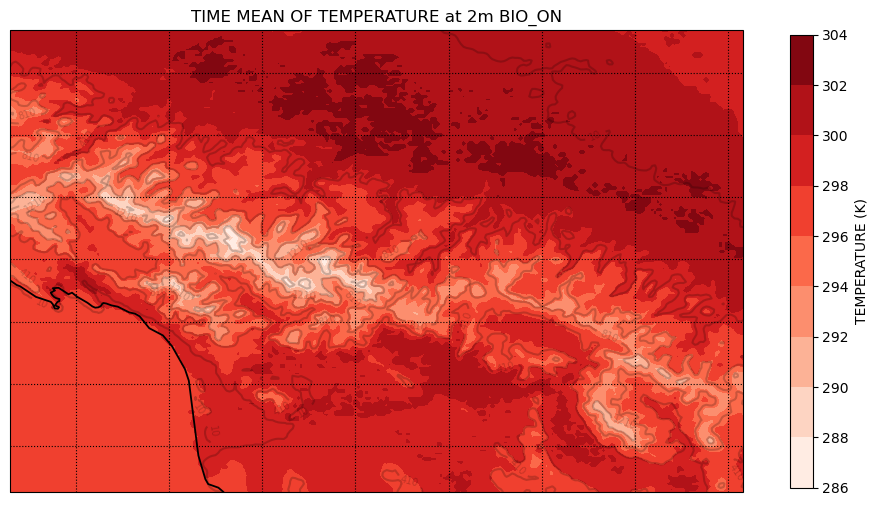

In [10]:
# Create a figure
fig = plt.figure(figsize=(12,6))
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
#
contour_levels = np.arange(286,306,2)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
contourf =plt.contourf(to_np(lons), to_np(lats), to_np(qn_int_mean), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("Reds") , levels = contour_levels)
# Add a color bar
#plt.colorbar(ax=ax, shrink=.98)
# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)
cbar.set_label('TEMPERATURE (K)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("TIME MEAN OF TEMPERATURE at 2m BIO_ON")

In [11]:
np.min(qn_int_mean)

<xarray.DataArray 'T2' ()>
array(286.4630127)

In [12]:
np.max(qn_int_mean)

<xarray.DataArray 'T2' ()>
array(303.07382202)

In [13]:
qn_int_mean_3x = qn_join_3x.mean('Time') #integrato verticale mediato sul tempo

Text(0.5, 1.0, 'TIME MEAN OF TEMPERATURE at 2m BIO_3X')

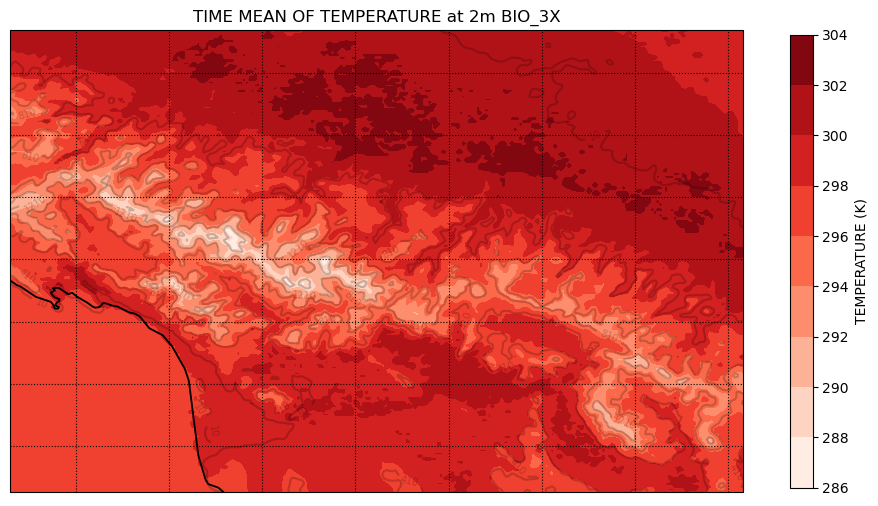

In [14]:
# Create a figure
fig = plt.figure(figsize=(12,6))
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
#
contour_levels = np.arange(286,306,2)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
contourf =plt.contourf(to_np(lons), to_np(lats), to_np(qn_int_mean_3x), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("Reds") , levels = contour_levels)
# Add a color bar
#plt.colorbar(ax=ax, shrink=.98)
# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)
cbar.set_label('TEMPERATURE (K)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("TIME MEAN OF TEMPERATURE at 2m BIO_3X")

In [15]:
diff_qn = qn_int_mean_3x - qn_int_mean   
diff_rel_qn = ( qn_int_mean_3x - qn_int_mean)/qn_int_mean  

Text(0.5, 1.0, 'TIME MEAN TEMPERATURE ABSOLUTE DIFFERENCE')

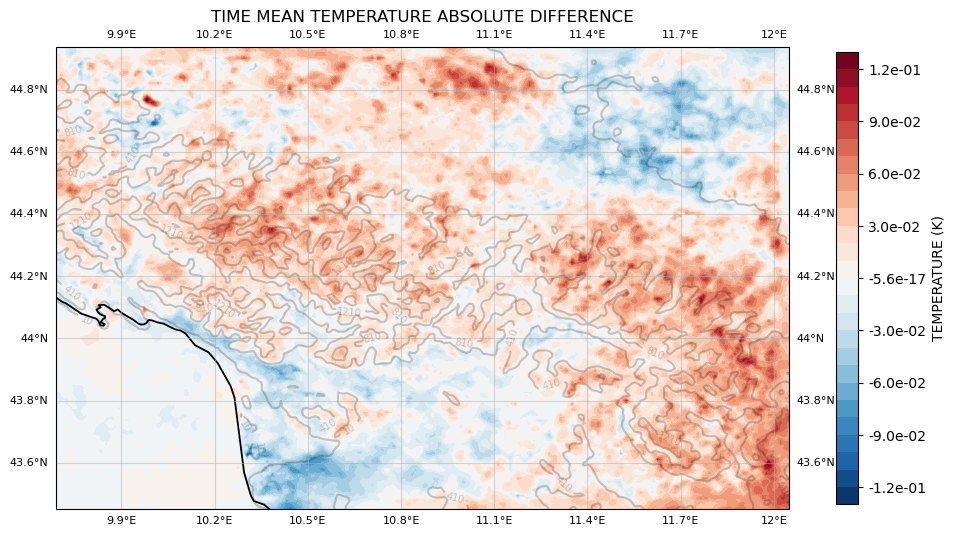

In [16]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contour_levels = np.arange(-0.13,0.13000001, 0.01)
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff_qn),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98, format='%.1e')
cbar.set_label('TEMPERATURE (K)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
#ax.add_feature(cf.BORDERS,color='k', linewidth = 0.6, alpha = 0.3);
#ax.add_feature(cf.STATES, linewidth = 1.3, alpha = 0.3)
#ax.add_feature(cartopy.feature.RIVERS, linewidth = 0.6,color='green', alpha = 0.6)
# Add the gridlines
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME MEAN TEMPERATURE ABSOLUTE DIFFERENCE")

Text(0.5, 1.0, 'TIME MEAN TEMPERATURE RELATIVE DIFFERENCE')

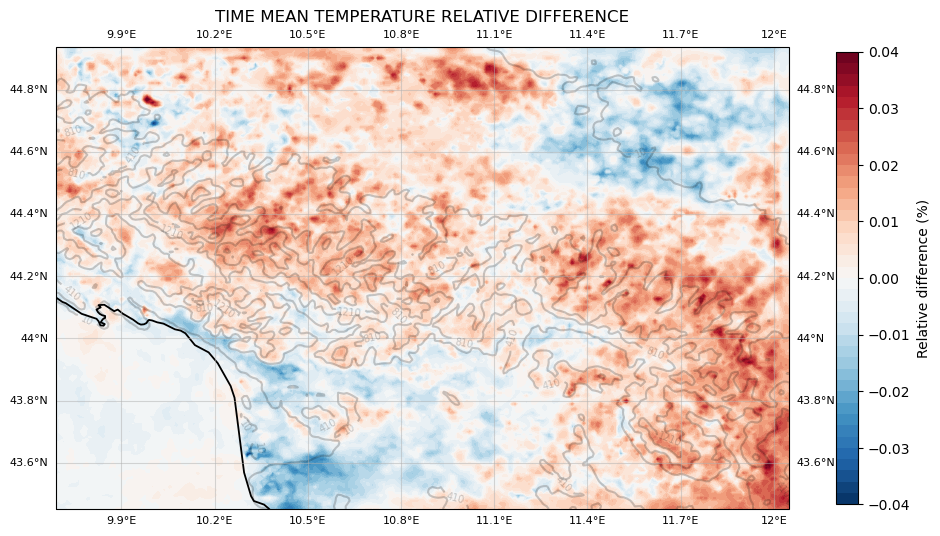

In [17]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contour_levels = np.arange(-0.04, 0.0400001, 0.002)
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff_rel_qn*100),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)
cbar.set_label('Relative difference (%)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
#ax.add_feature(cf.BORDERS,color='k', linewidth = 0.6, alpha = 0.3);
#ax.add_feature(cf.STATES, linewidth = 1.3, alpha = 0.3)
#ax.add_feature(cartopy.feature.RIVERS, linewidth = 0.6,color='green', alpha = 0.6)
# Add the gridlines
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME MEAN TEMPERATURE RELATIVE DIFFERENCE")

In [18]:
np.max(diff_qn)

<xarray.DataArray 'T2' ()>
array(0.13150024)

In [19]:
np.min(diff_qn)

<xarray.DataArray 'T2' ()>
array(-0.12850952)

In [15]:
day_series=qn_join[219:292,:,:]
day_series = np.mean(day_series, axis = (1,2))

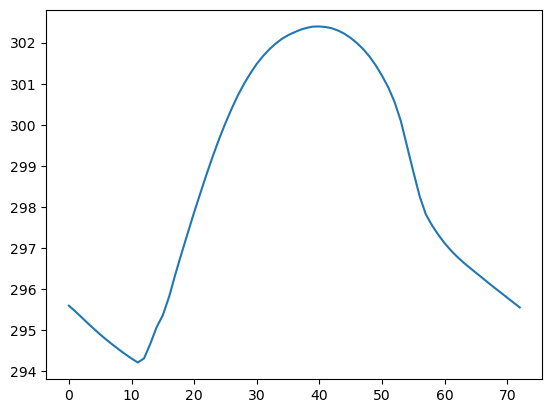

In [16]:
plt.plot(np.arange(73),day_series)

In [40]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
test = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/out_total_OA_bOA_aOA_ASOA_BSOA_POA_OPOA.PV4.nc")

In [26]:
long_vert3

257

In [41]:
lat1 = find_nearest(test.lat[:,0], 44.6)
long1 = find_nearest(test.lon[0,:], 11.6)

In [42]:
T = qn_join[:,lat1,long1]
T_3x = qn_join_3x[:,lat1,long1]

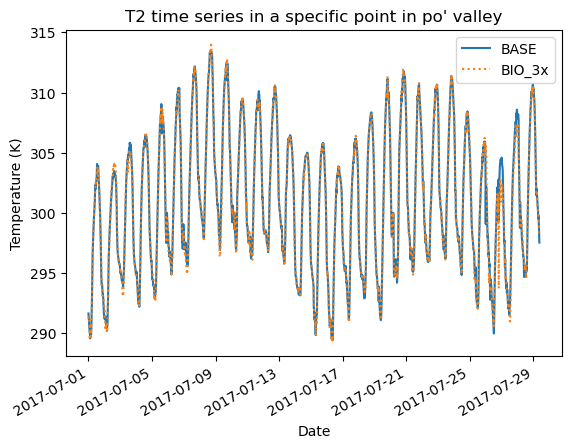

In [43]:
start_date = datetime.datetime(2017, 7, 1)
time_intervals = np.arange(0, len(qn_join)) * datetime.timedelta(minutes=20)
dates = [start_date + interval for interval in time_intervals]
plt.plot( dates, T, label = "BASE")
plt.plot( dates, T_3x, label = "BIO_3x", linestyle="dotted")
#plt.ylim(303,306)
plt.title("T2 time series in a specific point in po' valley" )
plt.ylabel('Temperature (K)')
plt.xlabel('Date')
plt.legend()
# Formattazione delle etichette dell'asse x per mostrare solo l'anno, il mese e il giorno
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()

(17373.0, 17375.0)

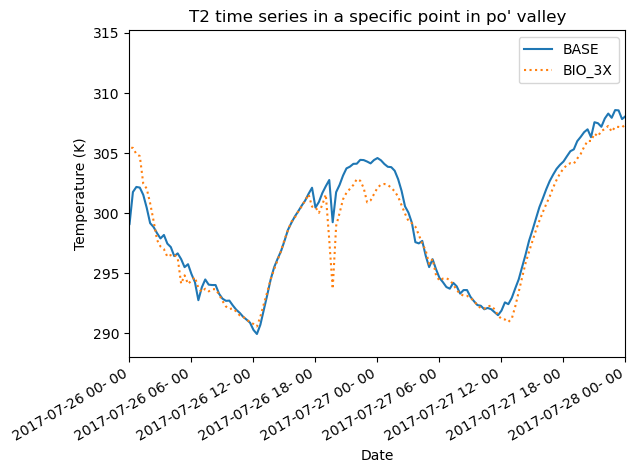

In [44]:
plt.plot(dates,T, label="BASE")
plt.plot(dates,T_3x,linestyle="dotted", label="BIO_3X")
plt.xlim(1820,1900)
plt.legend()
plt.title("T2 time series in a specific point in po' valley" )
plt.ylabel('Temperature (K)')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H- %M'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()
# Impostazione dei limiti dell'asse x
start_limit = datetime.datetime(2017, 7, 26,0,0)
end_limit = datetime.datetime(2017, 7, 28,0,0)
plt.xlim(start_limit, end_limit)

In [47]:
diff_T = T_3x - T

In [18]:
np.max(diff_T)

<xarray.DataArray 'T2' ()>
array(5.54455566)

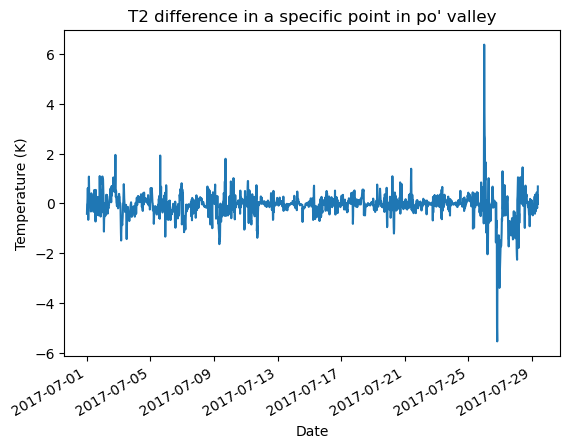

In [48]:
plt.plot(dates, diff_T)
plt.title("T2 difference in a specific point in po' valley" )
plt.ylabel('Temperature (K)')
plt.xlabel('Date')
# Formattazione delle etichette dell'asse x per mostrare solo l'anno, il mese e il giorno
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()
#plt.xlim(1790,1880)

(17373.0, 17375.0)

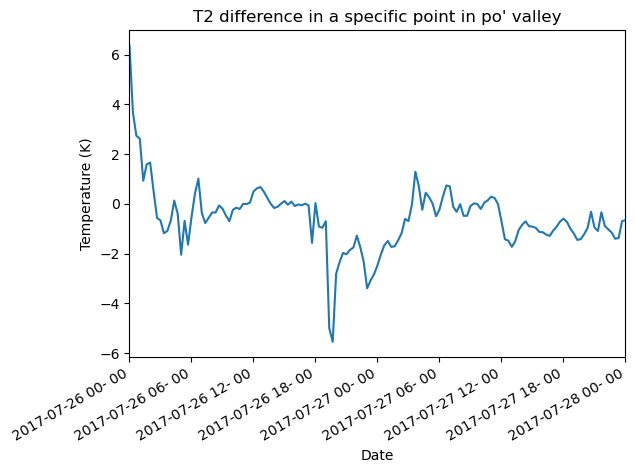

In [49]:
plt.plot(dates, diff_T)
plt.title("T2 difference in a specific point in po' valley" )
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H- %M'))

plt.ylabel('Temperature (K)')
plt.xlabel('Date')
# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()
# Impostazione dei limiti dell'asse x
start_limit = datetime.datetime(2017, 7, 26,0,0)
end_limit = datetime.datetime(2017, 7, 28,0,0)
plt.xlim(start_limit, end_limit)

In [50]:
np.min(diff_T)

<xarray.DataArray 'T2' ()>
array(-5.54455566)

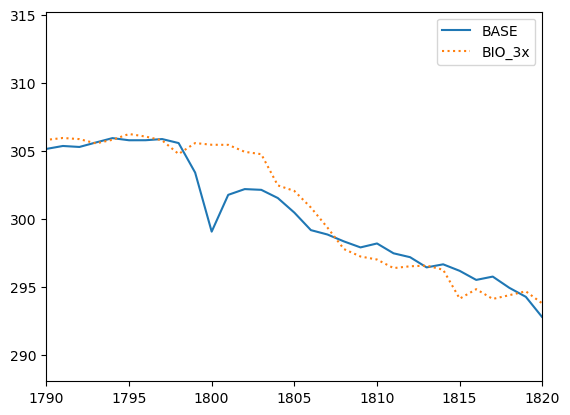

In [51]:
plt.plot( np.arange(2044), T, label = "BASE")
plt.plot( np.arange(2044), T_3x, label = "BIO_3x", linestyle='dotted')
plt.xlim(1790,1820)
#plt.ylim(293,305)
plt.legend()

In [52]:
T = qn_join[1800:1900,lat1,long1]
T_3x = qn_join_3x[1800:1900,lat1,long1]

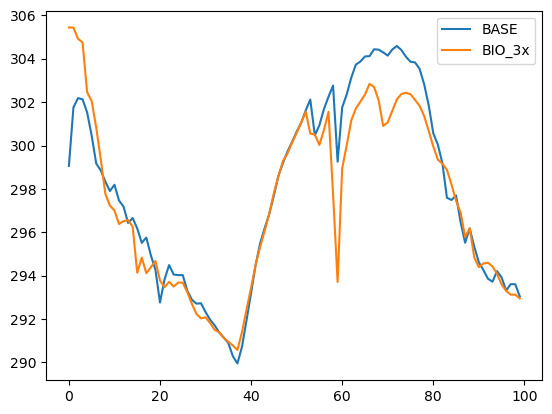

In [54]:
plt.plot( np.arange(100), T, label = "BASE")
plt.plot( np.arange(100), T_3x, label = "BIO_3x")
#plt.ylim(303,306)
plt.legend()

In [98]:
lat_vert1

62

In [95]:
long1

208

In [ ]:
lat_vert1 = find_nearest(test.lat[:,0], 44)
long_vert1 = find_nearest(test.lon[0,:], 12.2)

In [94]:
lat_vert2 = find_nearest(test.lat[:,0], 45)
long_vert2 = find_nearest(test.lon[0,:], 9.7)

In [ ]:
lat_vert3 = find_nearest(test.lat[:,0], 45)
long_vert3 = find_nearest(test.lon[0,:], 12.2)

In [5]:
qn_join1 = np.where(qn_join.south_north < 168 - 106/258*qn_join.west_east,  np.nan, qn_join)
qn_join2 = np.nanmean(qn_join1, axis=(0))
qn_join3 = np.nanmean(qn_join1, axis=(0,1,2))
qn_join4 = np.nanmean(qn_join1, axis=(1,2))

/tmp/appoloni/2696258/ipykernel_1177906/1788372668.py:2: RuntimeWarning: Mean of empty slice
  qn_join2 = np.nanmean(qn_join1, axis=(0))


Text(0.5, 1.0, 'TIME MEAN OF TEMPERATURE at 2m BIO_ON')

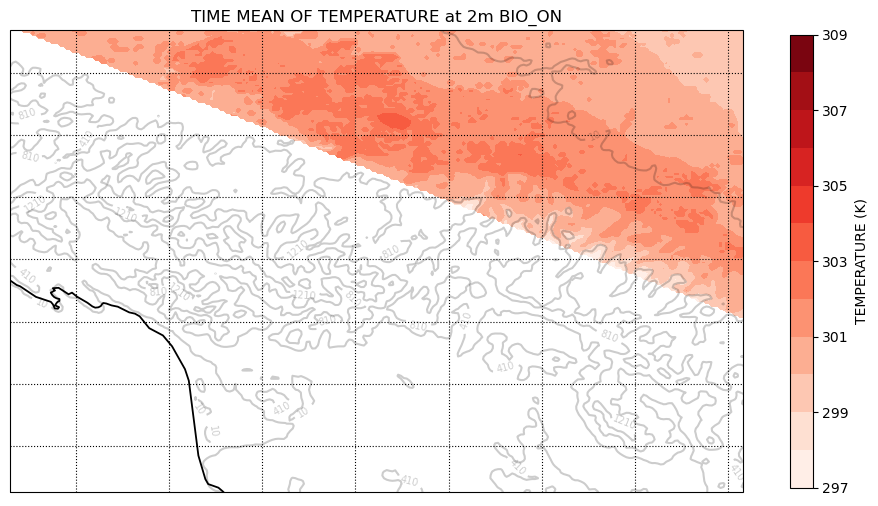

In [389]:
# Create a figure
fig = plt.figure(figsize=(12,6))
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
#
contour_levels = np.arange(297,310,1)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
contourf =plt.contourf(to_np(lons), to_np(lats), to_np(qn_join2), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("Reds") , levels = contour_levels)
# Add a color bar
#plt.colorbar(ax=ax, shrink=.98)
# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)
cbar.set_label('TEMPERATURE (K)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
# Add the gridlines
# Disegno del triangolo escluso
ax.gridlines(color="black", linestyle="dotted")
plt.title("TIME MEAN OF TEMPERATURE at 2m BIO_ON")

In [387]:
np.nanmax(qn_join2)

303.07382

In [388]:
np.nanmin(qn_join2)

297.05704

In [391]:
qn_join3

301.00262

In [8]:
qn_join_3x1 = np.where(qn_join_3x.south_north < 168 - 106/258*qn_join_3x.west_east,  np.nan, qn_join_3x)
qn_join_3x2 = np.nanmean(qn_join_3x1, axis=(0))
qn_join_3x3 = np.nanmean(qn_join_3x1, axis=(0,1,2))
qn_join_3x4 = np.nanmean(qn_join_3x1, axis=(1,2))

/tmp/appoloni/2696258/ipykernel_1177906/2652892142.py:2: RuntimeWarning: Mean of empty slice
  qn_join_3x2 = np.nanmean(qn_join_3x1, axis=(0))


In [399]:
qn_join_3x3

301.00888

Text(0.5, 1.0, 'TIME MEAN OF TEMPERATURE at 2m BIO_ON')

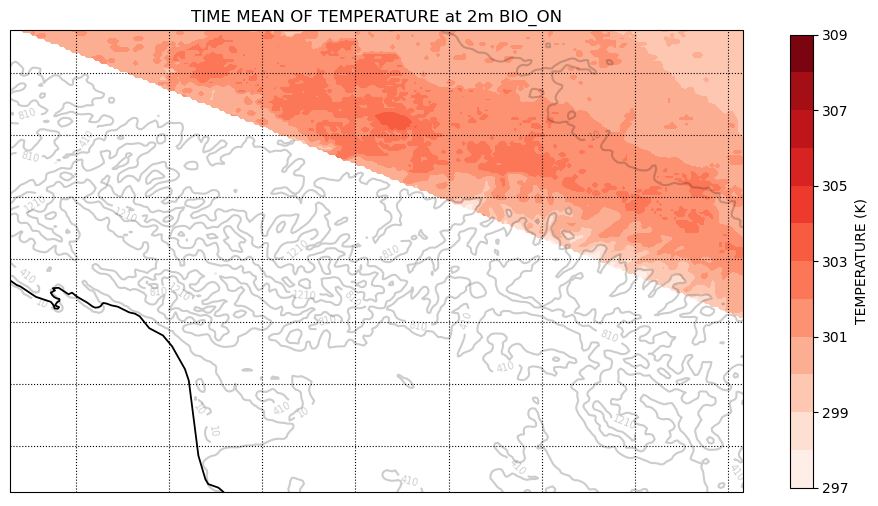

In [400]:
# Create a figure
fig = plt.figure(figsize=(12,6))
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
#
contour_levels = np.arange(297,310,1)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
contourf =plt.contourf(to_np(lons), to_np(lats), to_np(qn_join_3x2), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("Reds") , levels = contour_levels)
# Add a color bar
#plt.colorbar(ax=ax, shrink=.98)
# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)
cbar.set_label('TEMPERATURE (K)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
# Add the gridlines
# Disegno del triangolo escluso
ax.gridlines(color="black", linestyle="dotted")
plt.title("TIME MEAN OF TEMPERATURE at 2m BIO_ON")

In [401]:
diff = qn_join_3x2 - qn_join2

Text(0.5, 1.0, 'TIME MEAN TEMPERATURE ABSOLUTE DIFFERENCE')

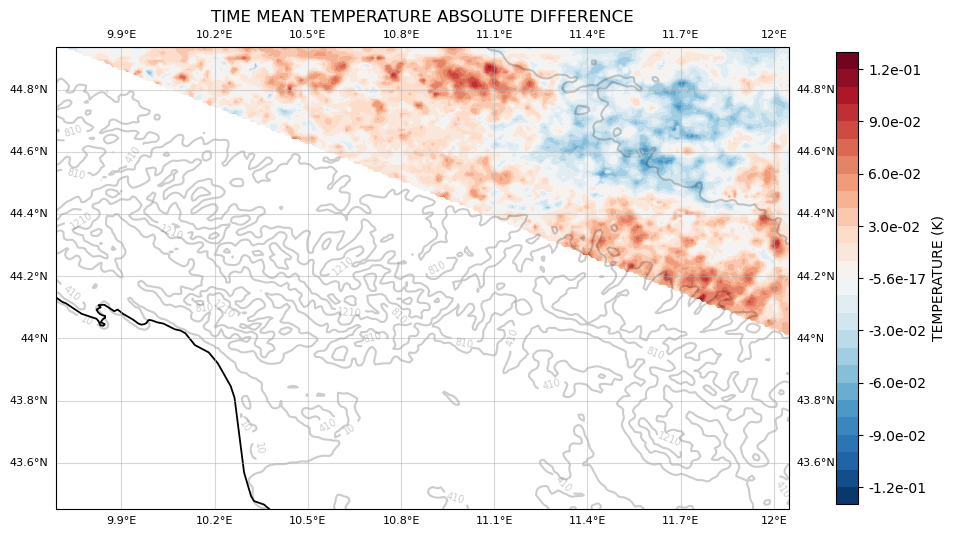

In [402]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contour_levels = np.arange(-0.13,0.13000001, 0.01)
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98, format='%.1e')
cbar.set_label('TEMPERATURE (K)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
#ax.add_feature(cf.BORDERS,color='k', linewidth = 0.6, alpha = 0.3);
#ax.add_feature(cf.STATES, linewidth = 1.3, alpha = 0.3)
#ax.add_feature(cartopy.feature.RIVERS, linewidth = 0.6,color='green', alpha = 0.6)
# Add the gridlines
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME MEAN TEMPERATURE ABSOLUTE DIFFERENCE")

In [10]:
T = qn_join[1800:1900,:,:]
T_3x = qn_join_3x[1800:1900,:,:]
T1 = np.where(T.south_north < 168 - 106/258*T.west_east,  np.nan, T)
T2 = np.nanmean(T1, axis=(0))
T3 = np.nanmean(T1, axis=(0,1,2))
T1_3x = np.where(T_3x.south_north < 168 - 106/258*T_3x.west_east,  np.nan, T_3x)
T2_3x = np.nanmean(T1_3x, axis=(0))
T3_3x = np.nanmean(T1_3x, axis=(0,1,2))

/tmp/appoloni/2694157/ipykernel_9147/1294287592.py:4: RuntimeWarning: Mean of empty slice
  T2 = np.nanmean(T1, axis=(0))
/tmp/appoloni/2694157/ipykernel_9147/1294287592.py:7: RuntimeWarning: Mean of empty slice
  T2_3x = np.nanmean(T1_3x, axis=(0))


In [11]:
T3

298.0425

In [12]:
T3_3x

297.79514

In [13]:
diff=T2_3x - T2

Text(0.5, 1.0, 'TIME MEAN TEMPERATURE ABSOLUTE DIFFERENCE')

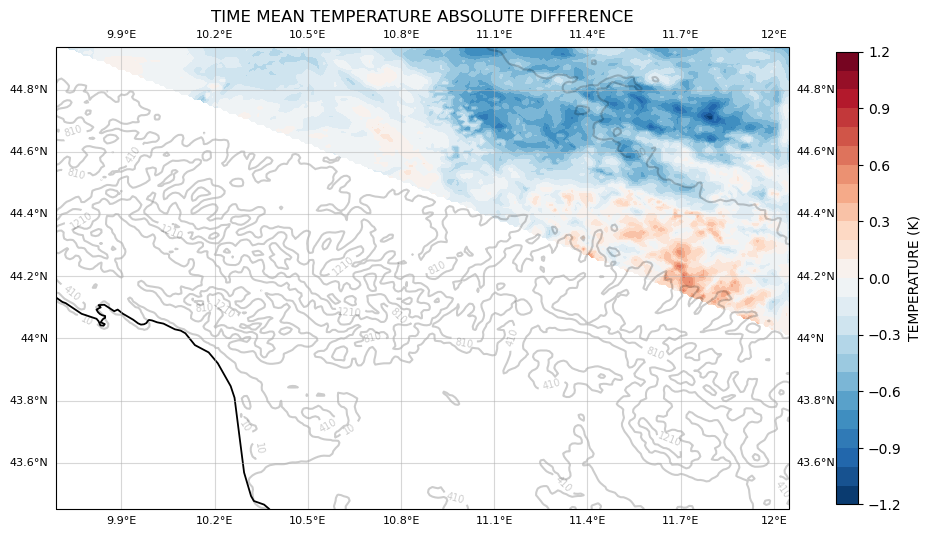

In [18]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contour_levels = np.arange(-1.2,1.2000001, 0.1)
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)#, format='%.1e')
cbar.set_label('TEMPERATURE (K)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
#ax.add_feature(cf.BORDERS,color='k', linewidth = 0.6, alpha = 0.3);
#ax.add_feature(cf.STATES, linewidth = 1.3, alpha = 0.3)
#ax.add_feature(cartopy.feature.RIVERS, linewidth = 0.6,color='green', alpha = 0.6)
# Add the gridlines
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME MEAN TEMPERATURE ABSOLUTE DIFFERENCE")

In [22]:
np.nanmin(T2)

293.45505

In [23]:
np.nanmin(T2_3x)

293.68607

In [26]:
np.nanmedian(T2)

297.9093

In [27]:
np.nanmedian(T2_3x)

297.6749

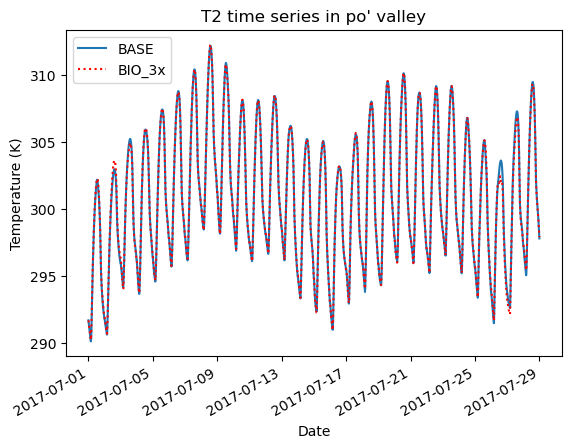

In [9]:
start_date = datetime.datetime(2017, 7, 1)
time_intervals = np.arange(0, len(qn_join4)) * datetime.timedelta(minutes=19.735)
dates = [start_date + interval for interval in time_intervals]
plt.plot( dates, qn_join4, label = "BASE")
plt.plot( dates, qn_join_3x4, label = "BIO_3x", linestyle="dotted",color = 'red')
#plt.ylim(303,306)
plt.title("T2 time series in po' valley" )
plt.ylabel('Temperature (K)')
plt.xlabel('Date')
plt.legend()
# Formattazione delle etichette dell'asse x per mostrare solo l'anno, il mese e il giorno
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()

(17373.0, 17374.208333333332)

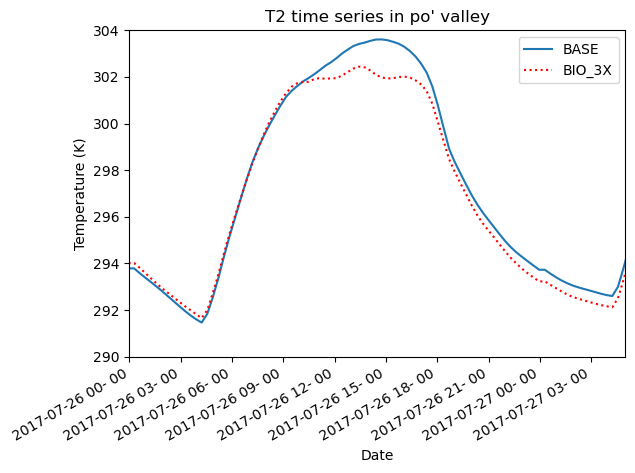

In [11]:
plt.plot(dates,qn_join4, label="BASE")
plt.plot(dates,qn_join_3x4,linestyle="dotted", label="BIO_3X", color = 'red')
#plt.xlim(1820,1900)
plt.legend()
plt.title("T2 time series in po' valley" )
plt.ylabel('Temperature (K)')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H- %M'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()
plt.ylim(290,304)
# Impostazione dei limiti dell'asse x
start_limit = datetime.datetime(2017, 7, 26,0,0)
end_limit = datetime.datetime(2017, 7, 27,5,0)
plt.xlim(start_limit, end_limit)

In [ ]:
diff_T = qn_join_3x4 - qn_join4

In [56]:
np.max(diff_T)

0.6965637

In [57]:
np.min(diff_T)

-1.6420288

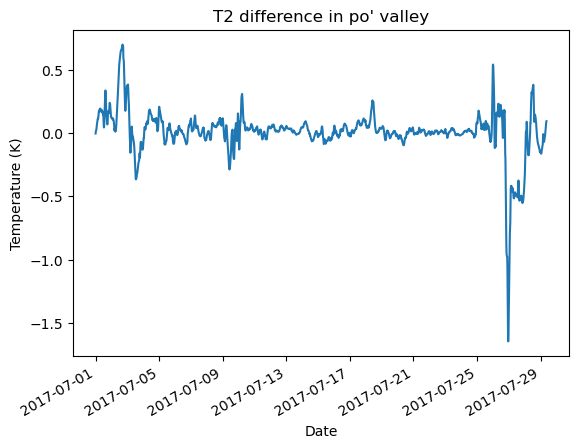

In [59]:
plt.plot(dates, diff_T)
plt.title("T2 difference in po' valley" )
plt.ylabel('Temperature (K)')
plt.xlabel('Date')
# Formattazione delle etichette dell'asse x per mostrare solo l'anno, il mese e il giorno
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()
#plt.xlim(1790,1880)

(17373.0, 17375.0)

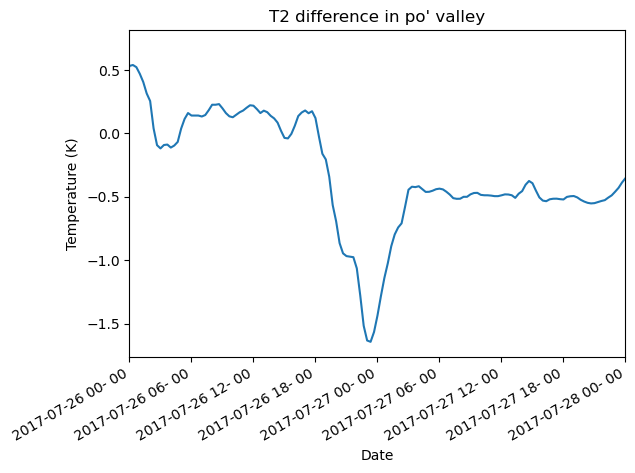

In [61]:
plt.plot(dates, diff_T)
plt.title("T2 difference in po' valley" )
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H- %M'))

plt.ylabel('Temperature (K)')
plt.xlabel('Date')
# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()
# Impostazione dei limiti dell'asse x
start_limit = datetime.datetime(2017, 7, 26,0,0)
end_limit = datetime.datetime(2017, 7, 28,0,0)
plt.xlim(start_limit, end_limit)